In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("SpamDetection") \
    .getOrCreate()


In [3]:
path = r"C:\Users\aamir\Desktop\YC\P\spam-detection-nlp\data\raw\DataSet_Emails.csv"

df = spark.read.csv(path, header=True, inferSchema=True)


In [4]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- message_id: string (nullable = true)
 |-- text: string (nullable = true)
 |-- label: string (nullable = true)
 |-- label_text: string (nullable = true)
 |-- subject: string (nullable = true)
 |-- message: string (nullable = true)
 |-- date: string (nullable = true)



In [5]:
df.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+-------+-------+----+
|                 _c0|          message_id|                text|               label|          label_text|subject|message|date|
+--------------------+--------------------+--------------------+--------------------+--------------------+-------+-------+----+
|                   0|               33214|any software just...|                NULL|                NULL|   NULL|   NULL|NULL|
|lead me not into ...|                NULL|                NULL|                NULL|                NULL|   NULL|   NULL|NULL|
|# 3533 . the law ...|                   1|                spam|any software just...|understanding oem...|   NULL|   NULL|NULL|
|lead me not into ...|                NULL|                NULL|                NULL|                NULL|   NULL|   NULL|NULL|
|# 3533 . the law ...|          2005-06-18|                NULL|                NULL|                NUL

In [6]:
df.count()

1494813

In [7]:
df.columns

['_c0',
 'message_id',
 'text',
 'label',
 'label_text',
 'subject',
 'message',
 'date']

In [8]:
df = df.na.drop()


In [9]:
df = df.dropDuplicates()


In [16]:
df.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                 _c0|          message_id|                text|               label|          label_text|             subject|             message|                date|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|the true impact o...| such as uncoveri...| influence prices...|            however | is transforming ...| enron ' s buy an...| or they can stri...| enrononline is a...|
|but these derivat...| which is close t...| that number almo...| at least some of...| or profitable fo...| all in - the - m...| enron stock was ...| way above the av...|
|we do have full r...|         alias maya |           autodesk |            borland |              corel | crystal reports ...|         file maker |  

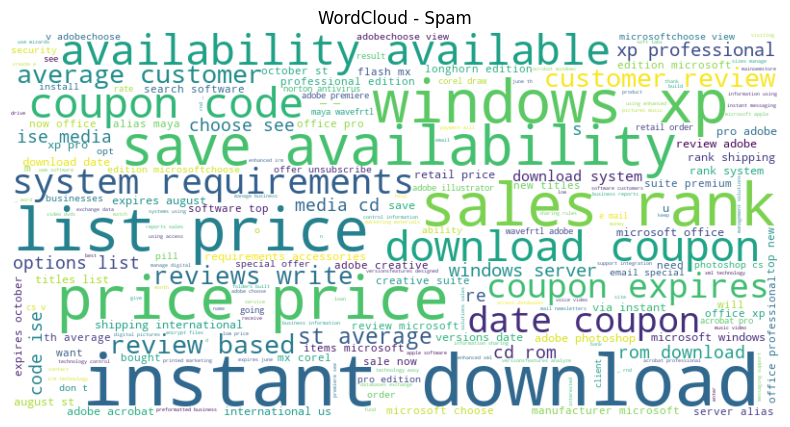

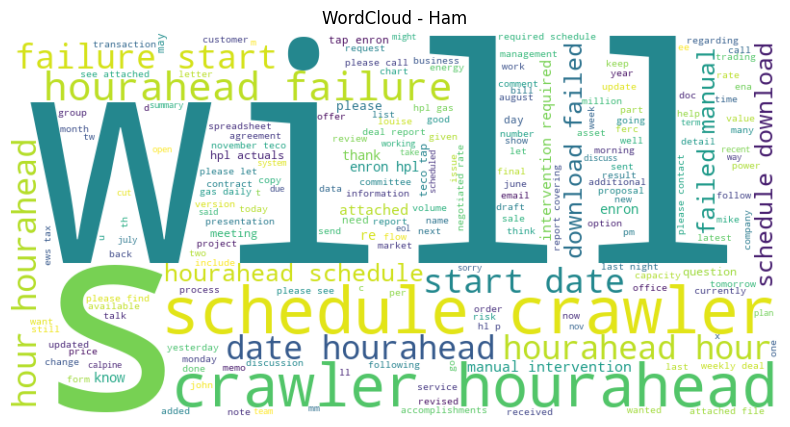

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

pdf = df.toPandas()

def plot_wordcloud(text, title):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=set(STOPWORDS)
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


spam_text = " ".join(pdf[pdf['label_text'] == 'spam']['text'].astype(str).tolist())
ham_text = " ".join(pdf[pdf['label_text'] == 'ham']['text'].astype(str).tolist())

plot_wordcloud(spam_text, "WordCloud - Spam")

plot_wordcloud(ham_text, "WordCloud - Ham")
